In [3]:
import numpy as np
import matplotlib.pyplot as plt

from scipy.cluster.hierarchy import linkage, fcluster
from collections import defaultdict
from pprint import pprint

%matplotlib inline

Read in the auto generated index for the compilers course.

In [25]:
DATA_DIR = '../../data/'
index = set()
with open(DATA_DIR + 'auto_index.txt') as f:
    for line in f:
        if len(line.split()) == 1:
            index.add(line.strip())

Read in pretrained word vectors. These are too big to fit in the repo, they should be downloaded from http://nlp.stanford.edu/data/glove.6B.zip and put in the data directory. At a first glance, these seem to work better.

In [38]:
vectors = {}
with open(DATA_DIR + 'glove.6B/glove.6B.300d.txt') as f:
    for line in f:
        splits = line.strip().split()
        word = splits[0]
        vector = np.array([float(n) for n in splits[1:]])
        vectors[word] = vector

KeyboardInterrupt: 

Vectors trained on closed caption files.

In [39]:
vectors = {}
with open(DATA_DIR + 'vectors.txt') as f:
    for line in f:
        splits = line.strip().split()
        word = splits[0]
        vector = np.array([float(n) for n in splits[1:]])
        vectors[word.lower()] = vector

Get phrase vectors by summing word vectors.

In [34]:
def get_phrase_vector(phrase):
    words = phrase.split()
    result = np.zeros(len(vectors.values()[0]))
    for word in words:
        if word not in vectors:
            print('Could not find {}'.format(word))
        else:
            result += vectors[word]
    return result

Cluster the words.

In [26]:
X = [get_phrase_vector(phrase) for phrase in index]
Z = linkage(X, method='ward', metric='euclidean')

Plot the cost of merging two clusters vs. the merge number (should be monotonically increasing).

In [ ]:
print(Z[:, 2])
plt.plot(Z[:, 2])
plt.xlabel('iteration')
_ = plt.ylabel('merge cost')

Recover the clusters, stopping merging at some distance.

In [ ]:
cluster_idxs = fcluster(Z, 11.0, criterion='distance')

In [ ]:
clusters = defaultdict(set)
for phrase, cluster_idx in zip(index, cluster_idxs):
    clusters[cluster_idx].add(phrase)
pprint(clusters.values())
print(len(clusters))

In [2]:
from sklearn.decomposition import PCA

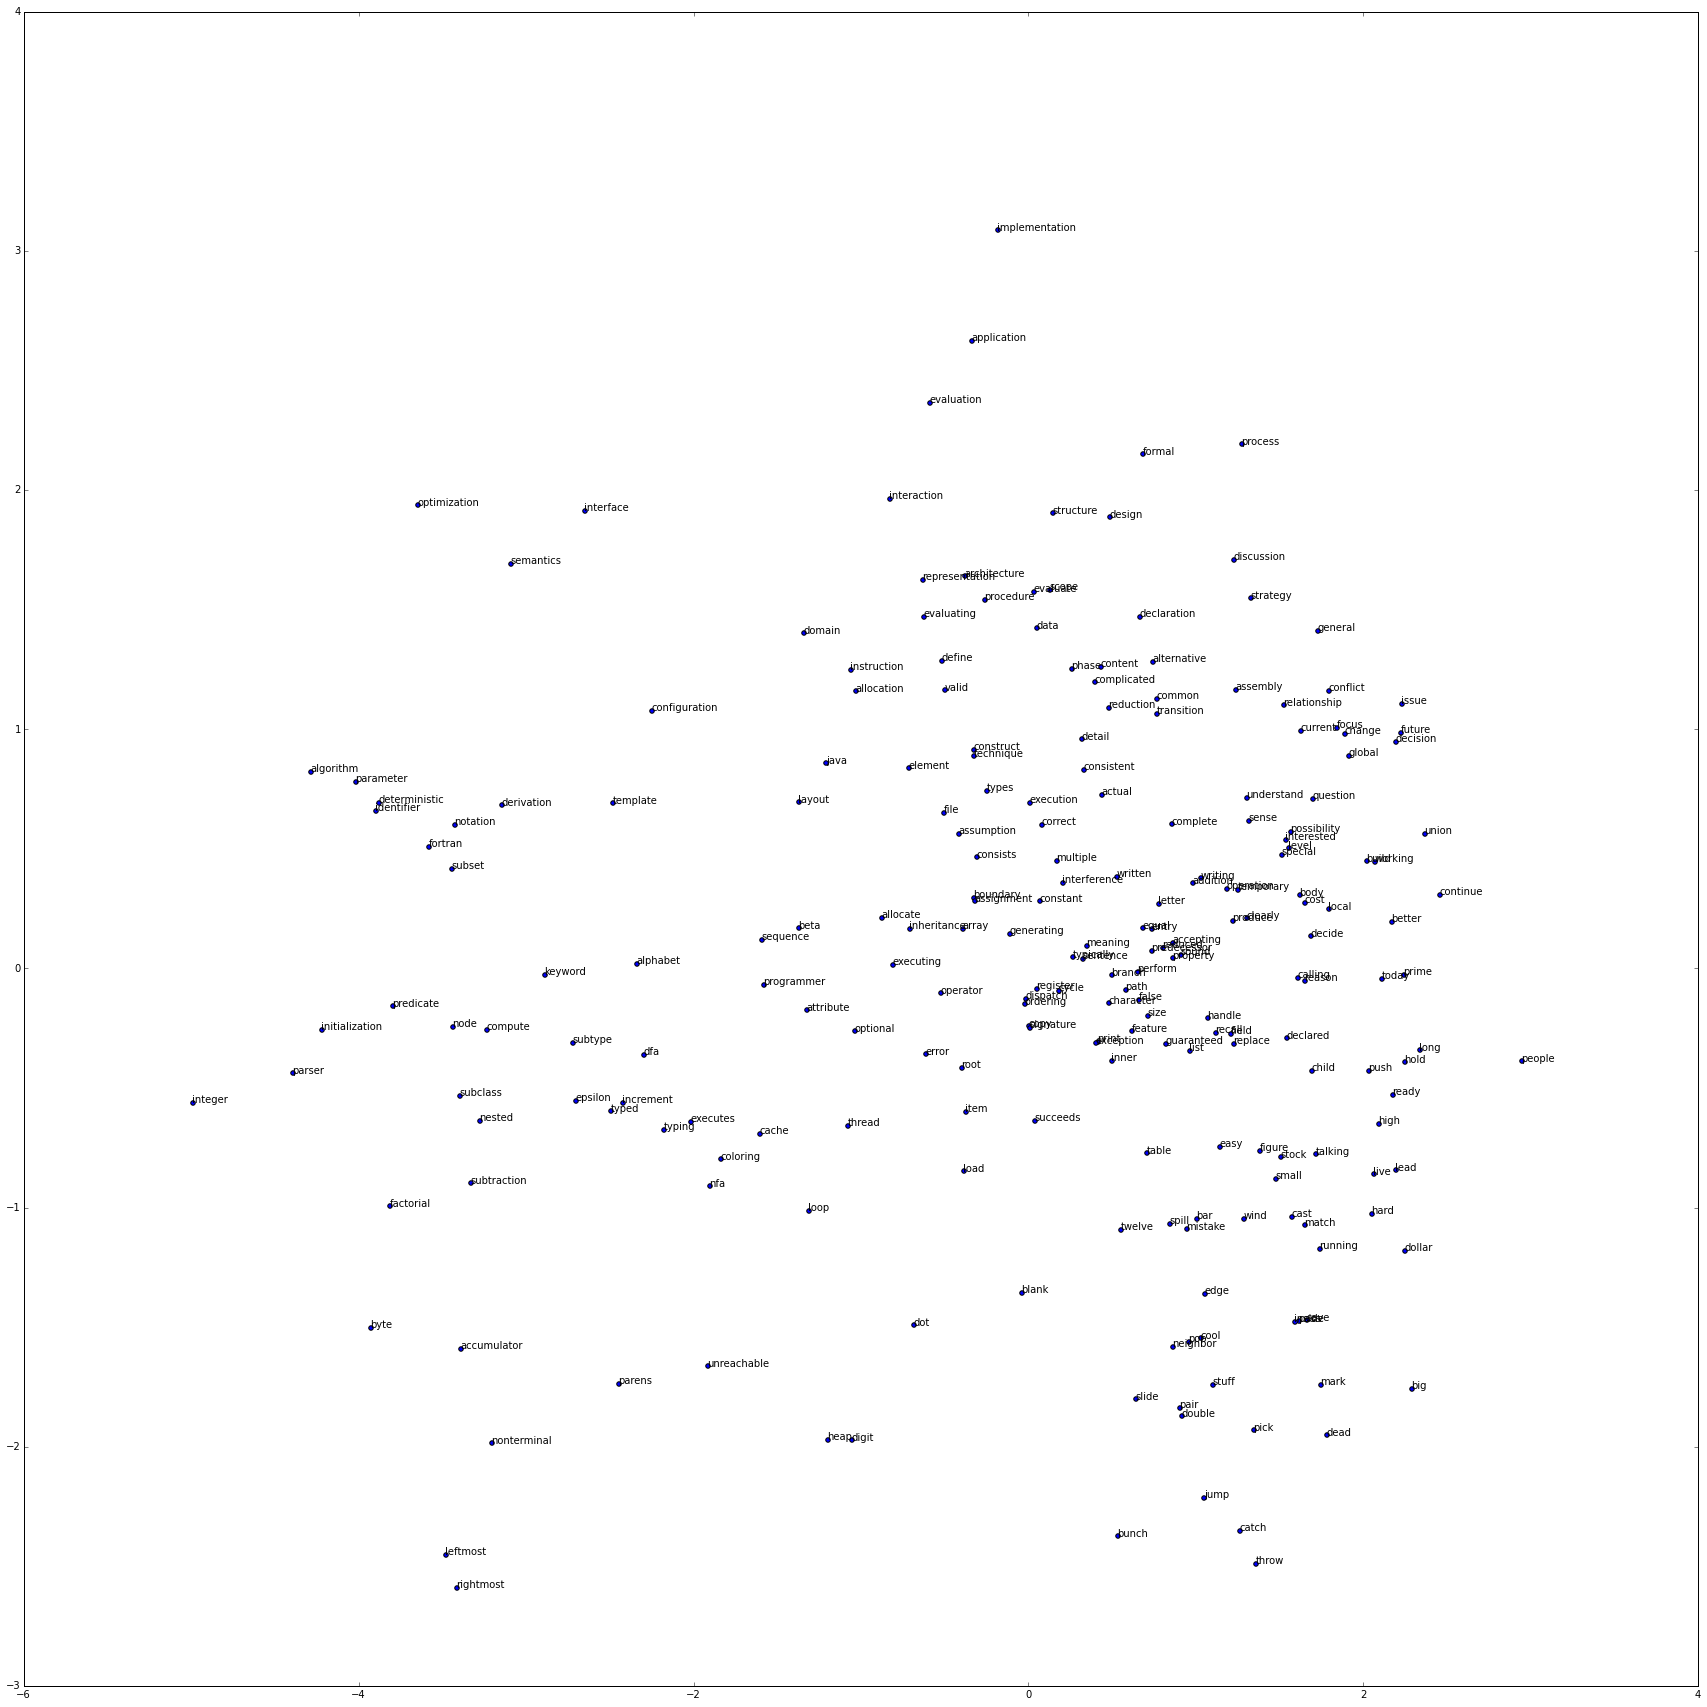

In [40]:
pca = PCA(n_components=2)
X_ld = pca.fit_transform(X)
plt.scatter(X_ld[:, 0], X_ld[:, 1])
for label, point in zip(index, X_ld):
    plt.annotate(label, point)
    
fig = plt.gcf()
fig.set_size_inches(30, 30)
plt.savefig('temp.png')